In [7]:
from stockai.llm import LLM

llm = LLM('embedding')

llm.get_embeddings().embed_query("你好")



[-0.007786486,
 0.0030635218,
 0.048999373,
 -0.01888824,
 -0.035900466,
 0.015862327,
 -0.01067077,
 0.0041407053,
 -0.00090730225,
 0.021380873,
 0.07677743,
 0.016190486,
 0.02762464,
 -0.014990083,
 -0.043697175,
 -0.00022716483,
 -0.0028992645,
 -0.040561415,
 -0.021718135,
 -0.03863862,
 -0.008903424,
 -0.023674773,
 -0.054912,
 -0.034821577,
 0.025135666,
 0.03655958,
 0.028641539,
 0.00016932108,
 0.025531072,
 0.04018289,
 -0.022235371,
 -0.04130813,
 0.030629976,
 -0.016588442,
 -0.028407967,
 -0.0050124764,
 0.018585792,
 -0.020895297,
 -0.035891443,
 -0.060278647,
 0.04564358,
 -0.022089215,
 0.082795314,
 -0.00743427,
 0.035391152,
 -0.018704215,
 -0.049329944,
 -0.01379917,
 0.030861447,
 -0.032388702,
 -0.0067101168,
 -0.048089013,
 0.064865164,
 0.02483853,
 0.014289522,
 -0.0107837645,
 0.007322614,
 -0.026721241,
 0.0043201107,
 0.067896225,
 0.02485328,
 -0.0123031065,
 0.023151526,
 -0.012036504,
 0.05569106,
 0.019995807,
 0.01446923,
 0.023831705,
 0.025877452,
 -

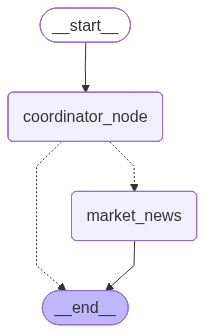

In [2]:
from langchain_core.messages import HumanMessage
from stockai.agent import graph
from IPython.display import Image, display


display(Image(graph.get_graph(xray = True).draw_mermaid_png()))

# for chunk in graph.stream({'user_input': HumanMessage(content = '今天的大盘如何')}, stream_mode = 'updates'):
#     if 'tools' in chunk.keys():
#         chunk['tools']['messages'][0].pretty_print()
#     elif 'agent' in chunk.keys():
#         chunk['agent']['messages'][0].pretty_print()
#     else:
#         print(chunk)

In [1]:
from stockai.subagents.market import get_proper_concept

result = get_proper_concept({'user_input' : '今天涨幅前3的板块是哪些'})

INFO:stockai.llm:使用 DeepSeek Chat 模型: deepseek-chat
INFO:httpx:HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:stockai.tools.akshare.client:调用AKShare API: stock_board_concept_name_em params={'args': (), 'kwargs': {}}


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:stockai.tools.akshare.client:API调用成功: stock_board_concept_name_em, 耗时: 1459.5ms
INFO:httpx:HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"


In [ ]:

from typing import Literal, Optional, Union
from langgraph.prebuilt import create_react_agent
from langchain_core.messages import HumanMessage
from stockai.llm import LLM
import pandas as pd
from stockai.tools.akshare import get_current_time

def get_index_kline(symbol: str,
                    start_date: Optional[str] = None,
                    end_date: Optional[str] = None,
                    period: Literal['1', '5', '15', '30', '60', 'daily', 'weekly'] = 'daily',
                    format: Optional[Literal['markdown', 'json', 'dict']] = 'dict') -> Union[str, pd.DataFrame]:
    """
    获取指数历史行情（分时/日/周）。

    参数:
    - symbol: 指数代码（如 '000001'）。
    - start_date/end_date: 'YYYYMMDD'，可空。
    - period: '1'|'5'|'15'|'30'|'60'|'daily'|'weekly'。
    - format: 'markdown'|'json'|'dict'|None；None 返回 DataFrame。

    返回:
    - 历史行情数据。
    """
    return '工具 get_index_kline 测试用占位文本数据'
    
    
def get_concept_kline(symbol: str,
                    start_date: Optional[str] = None,
                    end_date: Optional[str] = None,
                    period: Literal['1', '5', '15', '30', '60', 'daily', 'weekly'] = 'daily',
                    format: Optional[Literal['markdown', 'json', 'dict']] = 'dict') -> Union[str, pd.DataFrame]:
    """
    获取指数历史行情（分时/日/周）。

    参数:
    - symbol: 指数代码（如 '000001'）。
    - start_date/end_date: 'YYYYMMDD'，可空。
    - period: '1'|'5'|'15'|'30'|'60'|'daily'|'weekly'。
    - format: 'markdown'|'json'|'dict'|None；None 返回 DataFrame。

    返回:
    - 历史行情数据。
    """
    
    return '工具 get_concept_kline 测试用占位文本数据'


def get_stock_kline(stock_code: str,
                    start_date: Optional[str] = None,
                    end_date: Optional[str] = None,
                    period: Literal['1', '5', '15', '30', '60', 'daily', 'weekly'] = 'daily',
                    format: Optional[Literal['markdown', 'json', 'dict']] = 'dict') -> Union[str, pd.DataFrame]:
    """
    获取个股历史行情（分时/日/周）。

    参数:
    - stock_code: 6 位股票代码。
    - start_date/end_date: 'YYYYMMDD'，可空。
    - period: '1'|'5'|'15'|'30'|'60'|'daily'|'weekly'。
    - format: 'markdown'|'json'|'dict'|None；None 返回 DataFrame。

    返回:
    - 历史行情数据。
    """

    return '工具 get_stock_kline 测试用占位文本数据'

def get_index_list(format: Optional[Literal['markdown', 'json', 'dict']] = 'dict') -> Union[str, pd.DataFrame]:
    """
    获取重要指数清单（两列：名称、代码）。

    参数:
    - format: 'markdown'|'json'|'dict'|None；None 返回 DataFrame。

    返回:
    - 两列结构：['名称','代码']。
    """
    
    return '工具 get_index_list 测试用占位文本数据'

def get_concept_list(format: Optional[Literal['markdown', 'json', 'dict']] = 'dict') -> Union[str, pd.DataFrame]:
    """
    获取重要指数清单（两列：名称、代码）。

    参数:
    - format: 'markdown'|'json'|'dict'|None；None 返回 DataFrame。

    返回:
    - 两列结构：['名称','代码']。
    """
    
    return '工具 get_concept_list 测试用占位文本数据'

def get_stock_list(format: Optional[Literal['markdown', 'json', 'dict']] = 'dict') -> Union[str, pd.DataFrame]:
    """
    获取重要指数清单（两列：名称、代码）。

    参数:
    - format: 'markdown'|'json'|'dict'|None；None 返回 DataFrame。

    返回:
    - 两列结构：['名称','代码']。
    """
    
    return '工具 get_stock_list 测试用占位文本数据'

system_prompt = f"""
        ---
        当前时间: {get_current_time()}
        ---
        请根据用户的需求，利用工具进行股票的走势情况分析
        
        # 工具
        ## 时间
        - get_current_time
        ## 股票清单
        - get_index_list: 获取沪深股市的重要指数列表
        - get_concept_list：获取板块列表
        - get_stock_list ：获取所有股票列表
        ## 行情数据
        - get_index_kline ：获取指数行情数据
        - get_concept_kline ：获取板块行情数据
        - get_stock_kline ：获取个股行情数据
        
        ## 说明
        - 如果用户没有提供给你需要分析的目的代码或名称，你需要自行调用工具获取
        - get_stock_list会获取超过5000条股票的数据，非必要不要使用，你应该根据用户的需求先缩小筛选范围，提取板块，在从板块中查找股票
        - 针对列表获取，优先选用markdown作为获得的数据格式，减少token占用
        - 针对行情数据，选择你最易于理解的数据格式[dict, markdown, json], 如果你要查询大量的K线数据，如1年的日线数据，在不影响你的数据理解的情况下，尽量使用markdown减少token调用
        - get_concept_kline：需要传入的是板块的名称而不是代码。
        
        # 一般分析流程
        - 使用prefix_kline(period = 'weekly') 提取最近1年的K线数据用以分析长期趋势
        - 使用prefix_kline(start_date = today - 7 days(eg. 2025-09-07), period = 'daily'), 提取最近7天的日线数据，分析最近的趋势情况
        - 使用prefix_kiline(, period = '5', start_date = today(eg. 2025-09-12), **kwargs)
        - 除非特殊要求，在分析分时数据时，使用不小于5分钟级别（period = '5'）的分时数据
        

        # 分析要求
        ## 总体趋势
        - 只基于获得的走势数据做分析，不要自行做假设
        - 用文字详细的描述数据时间内的走势趋势，使得其他人可以通过文字就了解到详细的走势情况
        - 除了走势，还要注意量价关系，不同的走势里，对应的成交量是什么样的
        - 目前价格距离最近的压力位和支撑位有多远。
        ## 最近走势
        - 详细分析最近几天的走势情况，对应的量价关系如何
        ## 分时数据
        - 你应该提取最新的1分钟分时数据，分析分时数据的趋势情况
        - 一天的1分钟数据应该有240行，如果你收到的数据不足240行，可能是由于当天的时间还未到收盘，请根据已提供的数据分析
        - 分时数据你除了需要关注趋势外，还需要重点关注最高价和最大成交量的时间，是否有连续的放量上升或下跌成交
        
        # 注意
        - 如果用户的需求中有明确查询到行情数据级别，请根据用户的需求调用工具，如仅分析日线的趋势和走势，或仅分析分时数据
        - 只基于数据做分析，不要自行做假设
        - 用文字详细的描述数据时间内的走势趋势，使得其他人可以通过文字就了解到详细的走势情况
        - 本次是测试流程，你将从工具中收到测试的无意义占位文本，请假定已获得真实数据并进行随后的工具调用，完成用户需求

        """
        
llm = LLM().get_model()
        
agent = create_react_agent(
            model = llm,
            tools = [get_index_kline, get_concept_kline, get_stock_kline,
                     get_index_list,get_concept_list,get_stock_list],
            prompt = system_prompt
        )
        
result = agent.invoke({'messages': [HumanMessage(content = '请帮我分析大盘的走势')]})

INFO:httpx:HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"


In [20]:
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

请帮我分析大盘的走势
================================== Ai Message ==================================

我来帮您分析大盘的走势。首先让我获取主要指数的列表，然后分析最具代表性的大盘指数走势。
Tool Calls:
  get_index_list (call_00_NePWNxzlwOD1zT5IRQETv6Pm)
 Call ID: call_00_NePWNxzlwOD1zT5IRQETv6Pm
  Args:
    format: markdown
================================= Tool Message =================================
Name: get_index_list

工具 get_index_list 测试用占位文本数据
================================== Ai Message ==================================

基于测试流程，我将假定已获得真实数据。通常大盘分析会关注上证指数（000001）和深证成指（399001）。让我先分析上证指数的长期趋势和近期走势。
Tool Calls:
  get_index_kline (call_00_kZj7h6qtIdUqcns0HprYN97h)
 Call ID: call_00_kZj7h6qtIdUqcns0HprYN97h
  Args:
    symbol: 000001
    period: weekly
    format: markdown
================================= Tool Message =================================
Name: get_index_kline

工具 get_index_kline 测试用占位文本数据
================================== Ai Message ===

In [3]:
from stockai.llm import LLM

LLM().get_model().invoke([{'role': 'user', 'content': '你好'}])

RateLimitError: Error code: 429 - {'error': {'message': 'Your account org-7aea324def544fad8efb8ddb7bbdf99e<ak-f4ffug346nyi11gd6881> request reached organization max RPM: 3, please try again after 1 seconds', 'type': 'rate_limit_reached_error'}}

In [8]:
user_input ='你好'

from pydantic import BaseModel
from langgraph.prebuilt import create_react_agent
from stockai.llm import LLM
from langchain_core.messages import HumanMessage
from stockai.tools.akshare import get_current_time


class Output(BaseModel):
    content: str
    


system_prompt = f"""
        ---
        ---
        请根据用户的需求，利用工具分析回答股票相关的问题
        
        # 工具
        - get_news_from_eastmoney
        - get_news_content_from_eastmoney
        - baidu_search
        
        # 流程
        - 然后使用get_news_from_eastmoney工具，获取东方财富网的新闻
        - 请根据新闻内容从中挑选出有助于判断上涨原因的新闻
        - 若新闻内容中的信息欠缺细节，可以使用get_news_content_from_eastmoney传入url列表提取完整的新闻内容
        - 如果以上两个工具依然找不到合适的消息，你可以使用baidu_search工具，搜索其他网站的新闻
        
        # 注意
        - 离当前时间越近的消息对当前走势的影响越大
        - 除非近期（1周内）找不到有效的消息，再考虑扩大消息查询的时间范围
        - 一切的判断都以你查询到的信息为准，不要自己创造任何信息
        - 如果实在找不到合适的消息，请直接回复不知道
        
        """

agent = create_react_agent(
        model = LLM().get_model(),
        tools = [get_current_time],
        prompt = system_prompt,
        response_format = Output
        )
    
result = agent.invoke({'messages': [HumanMessage(content = user_input)]})

INFO:httpx:HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"


In [9]:
result

{'messages': [HumanMessage(content='你好', additional_kwargs={}, response_metadata={}, id='05477ff0-55dd-4489-afa3-3784d78ae545'),
  AIMessage(content='你好！我是您的股票分析助手，可以帮助您分析股票相关的信息和新闻。\n\n我可以帮您：\n- 获取最新的股票市场新闻\n- 分析特定股票的上涨原因\n- 查询相关公司的最新动态\n- 搜索市场热点信息\n\n请告诉我您想了解哪只股票的信息，或者有什么具体的股票相关问题需要我帮您分析？', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 72, 'prompt_tokens': 399, 'total_tokens': 471, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'prompt_cache_hit_tokens': 0, 'prompt_cache_miss_tokens': 399}, 'model_name': 'deepseek-chat', 'system_fingerprint': 'fp_08f168e49b_prod0820_fp8_kvcache', 'id': '7a52a96c-669e-418d-9c1b-b9eb16193e0d', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--797e3fa4-c601-4ccd-9815-2f2917f740fa-0', usage_metadata={'input_tokens': 399, 'output_tokens': 72, 'total_tokens': 471, 'input_token_details': {'cache_read': 0}, 'output_token_details': 